<a href="https://colab.research.google.com/github/wawa2001/FP/blob/master/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
database = pd.read_csv("Country-data.csv")
database.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
mapping_df = pd.read_csv("continents2.csv")
mapping_df = mapping_df.rename(columns = {'name' : 'country'})
data = pd.merge(database, mapping_df[['country', 'region']], on="country", how="left")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Asia
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Europe
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Africa
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Africa
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Americas


In [ ]:
#Descriptive statistics of child mortality
data['child_mort'].describe()[['count', 'mean', 'std']]

count    167.000000
mean      38.270060
std       40.328931
Name: child_mort, dtype: float64

In [ ]:
#Descriptive statistics of health
data['health'].describe()[['count', 'mean', 'std']]

count    167.000000
mean       6.815689
std        2.746837
Name: health, dtype: float64

In [ ]:
#Descriptive statistics of inflation
data['inflation'].describe()[['count', 'mean', 'std']]

count    167.000000
mean       7.781832
std       10.570704
Name: inflation, dtype: float64

In [ ]:
#Descriptive statistics of life expectancy
data['life_expec'].describe()[['count', 'mean', 'std']]

count    167.000000
mean      70.555689
std        8.893172
Name: life_expec, dtype: float64

In [ ]:
#Descriptive statistics of GDP
data['gdpp'].describe()[['count', 'mean', 'std']]

count      167.000000
mean     12964.155689
std      18328.704809
Name: gdpp, dtype: float64

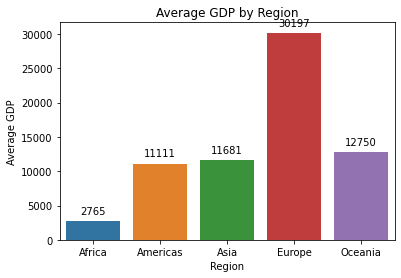

In [ ]:
mean_gdp_by_region = data.groupby('region')['gdpp'].mean().reset_index()

# Plot barplot
fig, ax = plt.subplots()
sns.barplot(x='region', y='gdpp', data=mean_gdp_by_region, ax = ax)

# Set plot title and axes labels
plt.title('Average GDP by Region')
plt.xlabel('Region')
plt.ylabel('Average GDP')

# Add labels to each bar in the count plot
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

In [ ]:
corr = data['gdpp'].corr(data['child_mort'])
print("Pearson Correlation Coefficient between GDP per capita and Child Mortality Rate : ", corr)

Pearson Correlation Coefficient between GDP per capita and Child Mortality Rate :  -0.4830321662167818


Text(0.5, 1.0, 'Scatterplot between GDP per capita and Income')

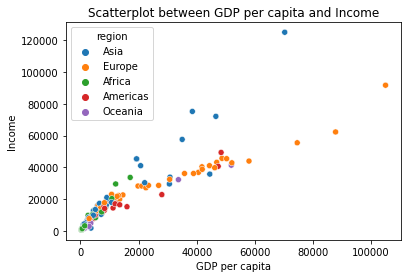

In [ ]:
sns.scatterplot(data = data, x = 'gdpp', y = 'income', hue = 'region')
plt.xlabel('GDP per capita')
plt.ylabel('Income')
plt.title('Scatterplot between GDP per capita and Income')

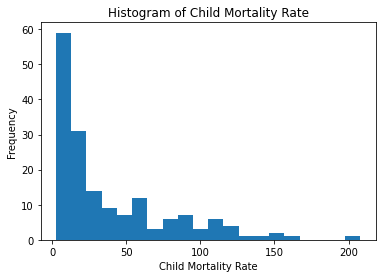

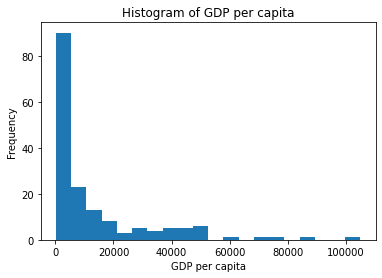

In [ ]:
# histograms
plt.hist(database['child_mort'], bins=20)
plt.xlabel('Child Mortality Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Child Mortality Rate')
plt.show()

plt.hist(database['gdpp'], bins=20)
plt.xlabel('GDP per capita')
plt.ylabel('Frequency')
plt.title('Histogram of GDP per capita')
plt.show()

In [ ]:
import scipy.stats as stats

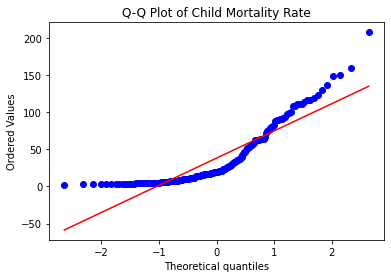

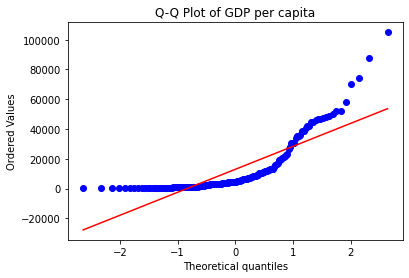

In [ ]:
# Q-Q plots
stats.probplot(database['child_mort'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Child Mortality Rate")
plt.show()

stats.probplot(database['gdpp'], dist="norm", plot=plt)
plt.title("Q-Q Plot of GDP per capita")
plt.show()

In [ ]:
from scipy.stats import spearmanr

# calculate Spearman's rank correlation coefficient and p-value
corr, pval = spearmanr(data['child_mort'], data['gdpp'])

# print the correlation coefficient and p-value
print("Spearman's correlation coefficient:", corr)
print("p-value:", pval)


Spearman's correlation coefficient: -0.8757501424856144
p-value: 4.631496183656829e-54
